In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
fraud=pd.read_csv('/content/Fraud_check.csv')

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Exploration

In [5]:
#checking missing data
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64



* no missing data so all the entries are valid for use




## Descriptive Analysis

In [6]:
fraud.shape

(600, 6)

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
#checking duplicate
fraud.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [9]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Feature Engineering

In [11]:
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-bf861314195c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['Taxable.Income'])


<Axes: xlabel='Taxable.Income', ylabel='Density'>

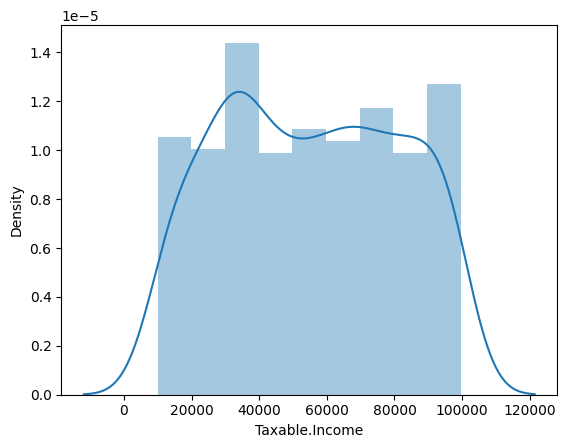

In [13]:
sns.distplot(fraud['Taxable.Income'])

In [14]:
df=pd.Series(fraud['Taxable.Income'])
s=[]
for i in df:
  if i<=30000:
    s.append('risky')

  else:
    s.append('good')

print(s)

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

In [15]:
df2=pd.DataFrame(s)
df3=pd.concat([df2,fraud],axis=1)
df3=df3.rename({0:'o/p'},axis=1)
df3

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...,...
595,good,YES,Divorced,76340,39492,7,YES
596,good,YES,Divorced,69967,55369,2,YES
597,good,NO,Divorced,47334,154058,0,YES
598,good,YES,Married,98592,180083,17,NO


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   o/p              600 non-null    object
 1   Undergrad        600 non-null    object
 2   Marital.Status   600 non-null    object
 3   Taxable.Income   600 non-null    int64 
 4   City.Population  600 non-null    int64 
 5   Work.Experience  600 non-null    int64 
 6   Urban            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [17]:
categorical_features = df3.describe(include=["object",'category']).columns
categorical_features

Index(['o/p', 'Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [18]:
numerical_features = df3.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

## Data Visualization

Univariate plots




<ipython-input-19-394a3f1bb62f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


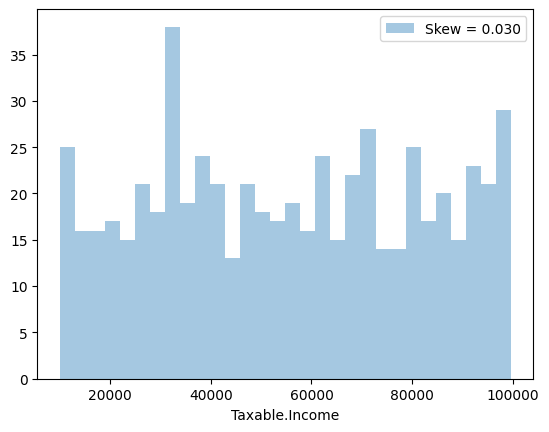

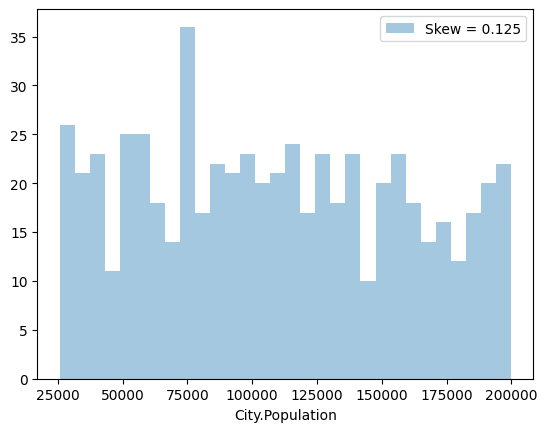

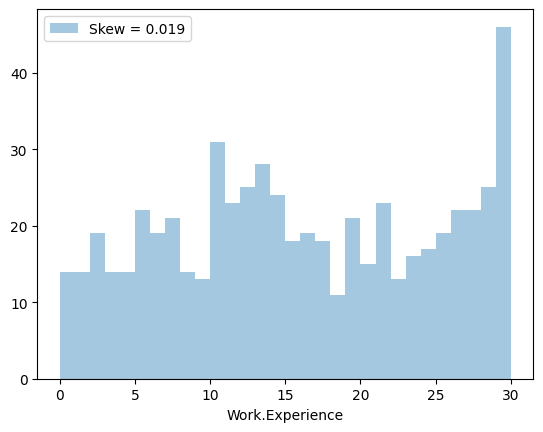

In [19]:
numerical_features=[feature for feature in df3.columns if df3[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df3[feat].skew()
    sns.distplot(df3[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## Multivariate Analysis

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned

<Figure size 800x800 with 0 Axes>

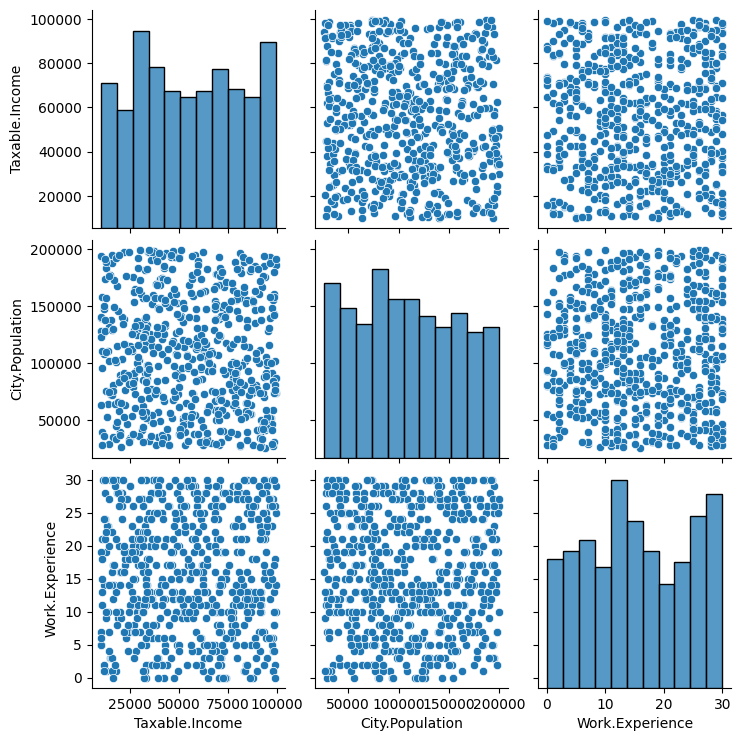

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(company, palette='coolwarm')
plt.show()

In [21]:
fraud.corr()

<ipython-input-21-a94b959ed6e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fraud.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<ipython-input-22-fcd549c0938a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr())


<Axes: >

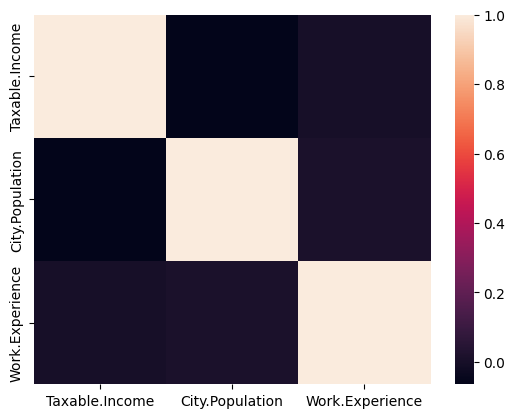

In [22]:
sns.heatmap(fraud.corr())

Data Pre-Processing

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [24]:
df3['Undergrad']=labelencoder.fit_transform(df3['Undergrad'])
df3['Marital.Status']=labelencoder.fit_transform(df3['Marital.Status'])
df3['Urban']=labelencoder.fit_transform(df3['Urban'])
df3['o/p']=labelencoder.fit_transform(df3['o/p'])

In [25]:
df3

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0
...,...,...,...,...,...,...,...
595,0,1,0,76340,39492,7,1
596,0,1,0,69967,55369,2,1
597,0,0,0,47334,154058,0,1
598,0,1,1,98592,180083,17,0


In [26]:
array=df3.values
array

array([[     0,      0,      2, ...,  50047,     10,      1],
       [     0,      1,      0, ..., 134075,     18,      1],
       [     0,      0,      1, ..., 160205,     30,      1],
       ...,
       [     0,      0,      0, ..., 154058,      0,      1],
       [     0,      1,      1, ..., 180083,     17,      0],
       [     0,      0,      0, ..., 158137,     16,      0]])

Splitting the dataset

In [27]:
X=array[:,1:7]
Y=array[:,0]


Model Building

In [28]:
#bagging
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
cart=DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=300, random_state=7)
results=cross_val_score(model, X,Y, cv=kfold)
print(results.mean())


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

0.9983333333333334


In [29]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

In [30]:
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=1000,max_features=5, criterion='gini')
results=cross_val_score(model, X,Y, cv=kfold)
print(results.mean())


0.9983333333333334
